#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape, " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape , " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()
model1 = Sequential()

In [8]:
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(32, 32,3), activation='relu', padding='same'))
model1.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(32, 32,3), activation='relu', padding='same'))
model.add(Dropout(rate=0.25))
model1.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model1.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))
model1.add(Flatten())
model1.add(Dropout(rate=0.25))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(rate=0.25))
model1.add(Dense(10, activation='softmax'))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [9]:
#檢查model 的STACK
print(model.summary())
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [10]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 37500 samples, validate on 12500 samples
Epoch 1/12





37500/37500 [==============================] - 161s 4ms/step - loss: 2.1642 - acc: 0.1991 - val_loss: 2.0585 - val_acc: 0.2948
Epoch 2/12
37500/37500 [==============================] - 160s 4ms/step - loss: 1.9536 - acc: 0.2975 - val_loss: 1.9542 - val_acc: 0.3381
Epoch 3/12
37500/37500 [==============================] - 171s 5ms/step - loss: 1.8386 - acc: 0.3478 - val_loss: 1.8465 - val_acc: 0.3857
Epoch 4/12
37500/37500 [==============================] - 170s 5ms/step - loss: 1.7369 - acc: 0.3812 - val_loss: 1.7647 - val_acc: 0.4125
Epoch 5/12
37500/37500 [==============================] - 165s 4ms/step - loss: 1.6528 - acc: 0.4096 - val_loss: 1.6775 - val_acc: 0.4468
Epoch 6/12
37500/37500 [==============================] - 169s 5ms/step - loss: 1.5831 - acc: 0.4323 - val_loss: 1.6282 - val_acc: 0.4567
Epoch 7/12
37500/3

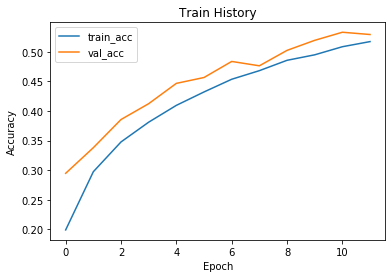

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.25, epochs=12, batch_size=128, verbose=1)
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Train History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 185s 5ms/step - loss: 0.0905 - acc: 0.1009 - val_loss: 0.0900 - val_acc: 0.1145
Epoch 2/12
37500/37500 [==============================] - 178s 5ms/step - loss: 0.0902 - acc: 0.1062 - val_loss: 0.0899 - val_acc: 0.1248
Epoch 3/12
37500/37500 [==============================] - 156s 4ms/step - loss: 0.0900 - acc: 0.1153 - val_loss: 0.0898 - val_acc: 0.1291
Epoch 4/12
37500/37500 [==============================] - 156s 4ms/step - loss: 0.0899 - acc: 0.1194 - val_loss: 0.0897 - val_acc: 0.1364
Epoch 5/12
37500/37500 [==============================] - 157s 4ms/step - loss: 0.0898 - acc: 0.1269 - val_loss: 0.0897 - val_acc: 0.1423
Epoch 6/12
37500/37500 [==============================] - 157s 4ms/step - loss: 0.0896 - acc: 0.1338 - val_loss: 0.0896 - val_acc: 0.1477
Epoch 7/12
37500/37500 [==============================] - 158s 4ms/step - loss: 0.0896 - acc: 0.1370 - val_loss: 0.0895 - 

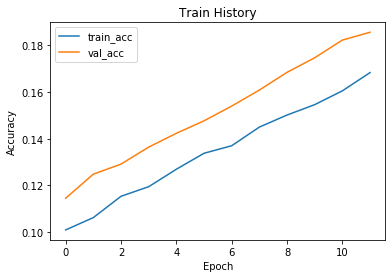

In [12]:
model1.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
train_history1=model1.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.25, epochs=12, batch_size=128, verbose=1)
plt.plot(train_history1.history['acc'])
plt.plot(train_history1.history['val_acc'])
plt.title('Train History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()

Seems MSE regress slower, seems not moving.